<a href="https://colab.research.google.com/github/BhairaveeN/pre-int/blob/main/pre_intiitb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("AH_Excess_Deaths_by_Sex__Age__and_Race_and_Hispanic_Origin_20231228.csv")

In [2]:
data.columns
data.dtypes

AnalysisDate                              object
Time Period                               object
MMWRyear                                 float64
MMWRweek                                 float64
Weekending                                object
RaceEthnicity                             object
Sex                                       object
AgeGroup                                  object
Deaths (weighted)                        float64
COVID19 (weighted)                       float64
Deaths (unweighted)                      float64
COVID19 (unweighted)                     float64
Average number of deaths (weighted)      float64
Average number of deaths (unweighted)    float64
Number above average (weighted)          float64
Percent above average (weighted)         float64
Number above average (unweighted)        float64
Percent above average (unweighted)       float64
Footnote                                  object
Geography                                 object
dtype: object

In [3]:
data.isnull().sum()

AnalysisDate                                 0
Time Period                                  1
MMWRyear                                     1
MMWRweek                                     1
Weekending                                   1
RaceEthnicity                                1
Sex                                          1
AgeGroup                                     1
Deaths (weighted)                            1
COVID19 (weighted)                           1
Deaths (unweighted)                          1
COVID19 (unweighted)                         1
Average number of deaths (weighted)          1
Average number of deaths (unweighted)        1
Number above average (weighted)           9949
Percent above average (weighted)          9949
Number above average (unweighted)         9949
Percent above average (unweighted)        9949
Footnote                                 13914
Geography                                    1
dtype: int64

In [4]:
data['MMWRweek'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., nan])

In [5]:
filtered_data = data[(data['MMWRyear'] >= 2018) & (data['MMWRyear'] <= 2022)]
filtered_data = filtered_data[(filtered_data['MMWRweek'] >= 1) & (filtered_data['MMWRweek'] <= 34)]
result = filtered_data.groupby(['MMWRyear'])['Deaths (weighted)'].sum()
print(result)

MMWRyear
2018.0    104584.0
2019.0    102323.0
2020.0    102689.0
2021.0    106388.0
2022.0    107762.0
Name: Deaths (weighted), dtype: float64


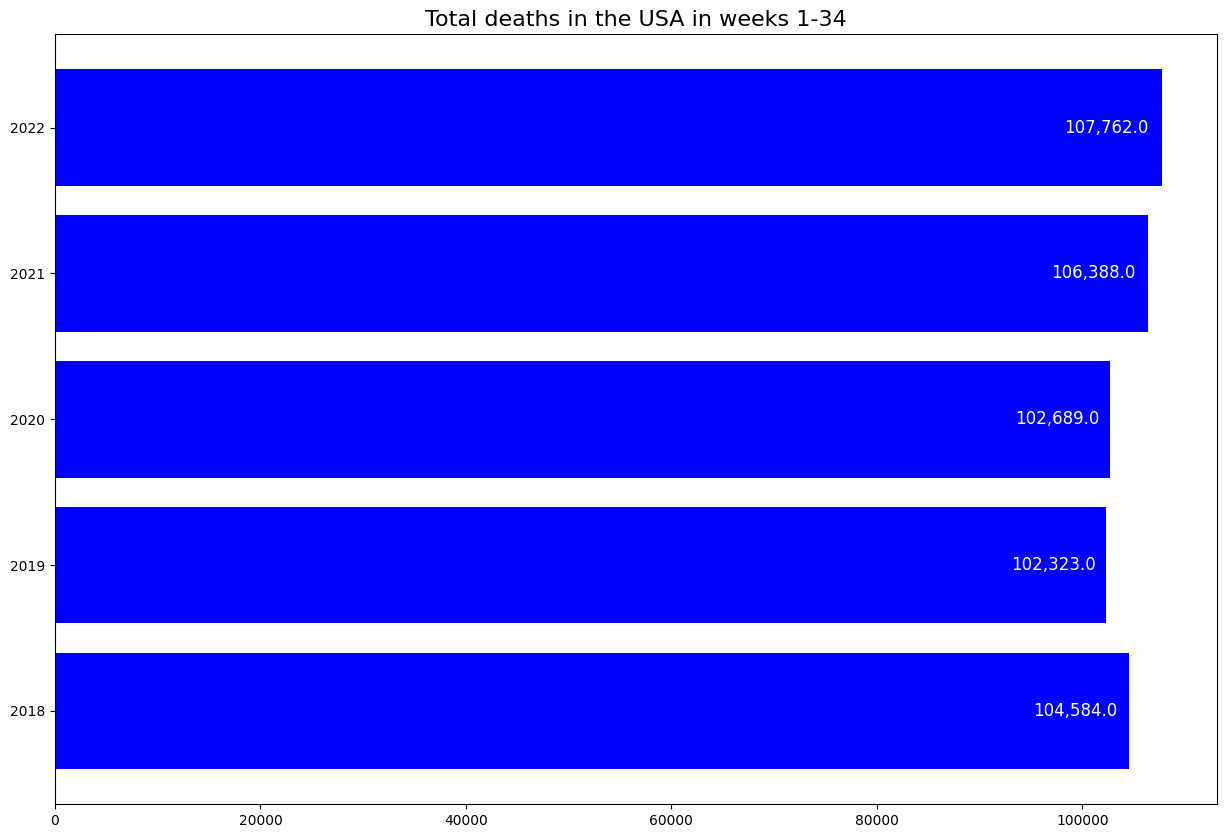

In [6]:
import matplotlib.pyplot as plt

filtered_data = data[(data['MMWRyear'] >= 2018) & (data['MMWRyear'] <= 2022)]
filtered_data = filtered_data[(filtered_data['MMWRweek'] >= 1) & (filtered_data['MMWRweek'] <= 34)]

result = filtered_data.groupby(['MMWRyear'])['Deaths (weighted)'].sum()

plt.figure(figsize=(15, 10))

bars = plt.barh(result.index, result.values, color='blue')

# plt.ylabel('Year', fontsize = 14)
# plt.xlabel('Sum of Weighted Deaths', fontsize=14)
plt.title('Total deaths in the USA in weeks 1-34', fontsize=16)

xvals = range(0, int(result.max()) + 1, 500000)

for bar, value in zip(bars, result.values):
    plt.text(bar.get_width() - 0.05 * bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:,}',
             va='center', ha='center', color='white', fontsize=12)

plt.show()

In [7]:
data1 = pd.read_excel('000005JU_20231228-194529.xlsx')

In [8]:
data1.head(3)

,Month,2015,2016,2017,2018,2019,2020
0,January,8665,8689,9282,8803,8372,8348
1,February,8092,7811,8025,8337,7487,7541
2,March,8666,8163,8248,9437,7791,8557


In [9]:
row_name_to_find = 'Unknown'
drop = data1[data1['Month'] == row_name_to_find].index[0]
data1 = data1.drop(drop)
data1.tail(3)

,Month,2015,2016,2017,2018,2019,2020
9,October,7239,7484,7587,7440,7536,7281
10,November,7343,7550,7482,7102,7438,8220
11,December,7943,8458,8259,8014,7896,10187


In [10]:
def quarter_label(month):
  if month in ['January', 'February', 'March']:
    return 'Jan-Mar'
  elif month in ['April', 'May', 'June']:
    return 'Apr-Jun'
  elif month in ['July', 'August', 'September']:
    return 'Jul-Sept'
  else:
    return 'Oct-Dec'


data1['Quarter'] = data1['Month'].apply(quarter_label)
data1.head()

,Month,2015,2016,2017,2018,2019,2020,Quarter
0,January,8665,8689,9282,8803,8372,8348,Jan-Mar
1,February,8092,7811,8025,8337,7487,7541,Jan-Mar
2,March,8666,8163,8248,9437,7791,8557,Jan-Mar
3,April,7731,7545,7731,7797,7373,10555,Apr-Jun
4,May,7351,7134,7488,6953,7147,8921,Apr-Jun


In [11]:
grouped_data = data1.groupby('Quarter')[['2015', '2016', '2017', '2018', '2019', '2020']].sum()
grouped_data

,2015,2016,2017,2018,2019,2020
Quarter,,,,,,
Apr-Jun,21928,21382,22056,21413,21154,26916
Jan-Mar,25423,24663,25555,26577,23650,24446
Jul-Sept,20940,21259,20836,21391,20830,20820
Oct-Dec,22525,23492,23328,22556,22870,25688


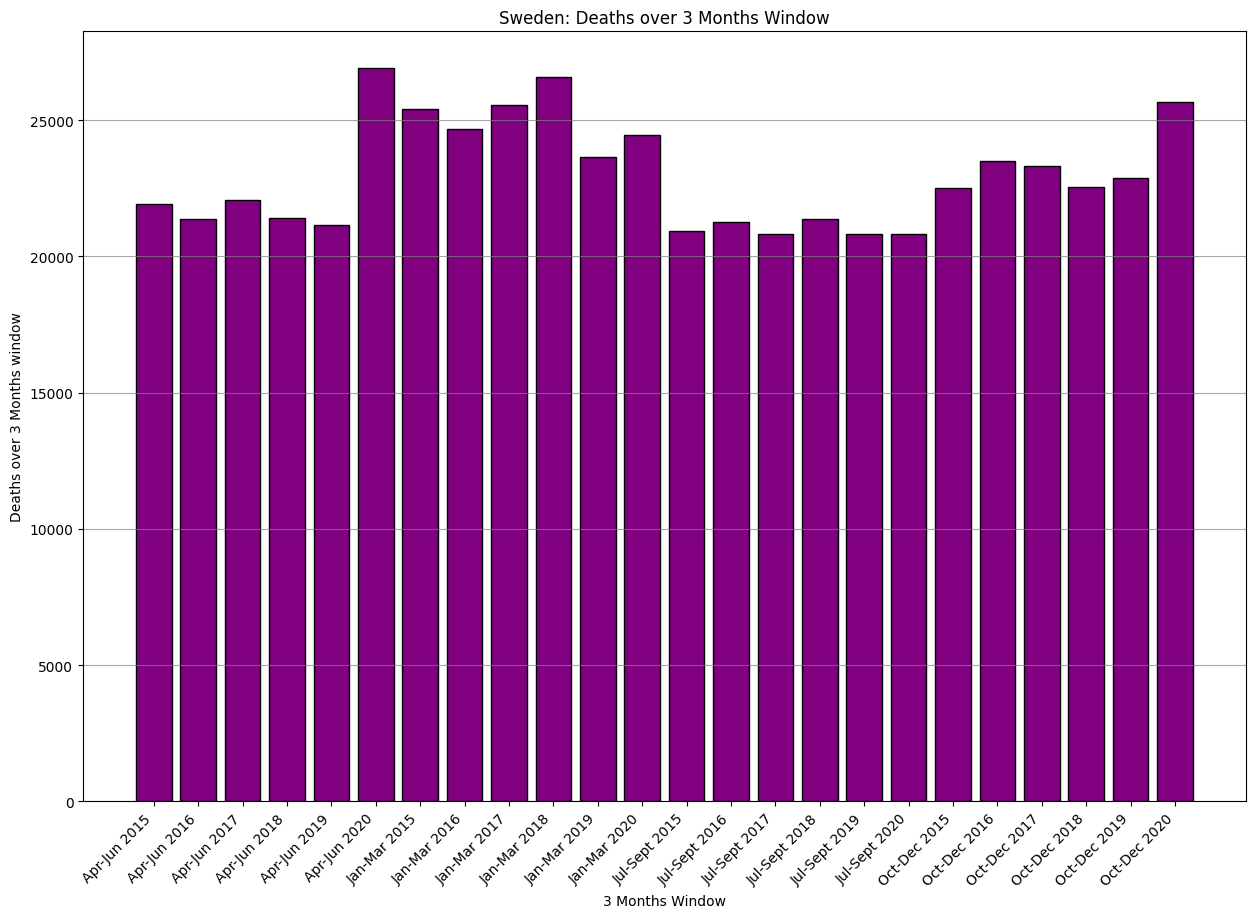

In [12]:
import numpy as np

flattened_data = grouped_data.values.flatten()
quarters = ['Apr-Jun', 'Jan-Mar', 'Jul-Sept', 'Oct-Dec']
plt.figure(figsize=(15, 10))
plt.grid(True, axis='y', linestyle='-', alpha=0.7, color='gray', zorder=0)
plt.bar(range(len(flattened_data)), flattened_data, color='purple', edgecolor='black')
plt.title('Sweden: Deaths over 3 Months Window')
plt.xlabel('3 Months Window')
plt.ylabel('Deaths over 3 Months window')
tick_positions = np.arange(len(flattened_data))
tick_labels = [f'{quarter} {year}' for quarter in quarters for year in grouped_data.columns]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.show()

In [13]:
data2 = pd.read_excel("12612-0002_$F.xlsx")

In [14]:
data2.head(2)

,Year,Month,Masculine,Feminine,In Total
0,2018,January,33450,31952,65402
1,2018,February,29978,28511,58489


In [15]:
data2['Quarter'] = data2['Month'].apply(quarter_label)
data2.head()

,Year,Month,Masculine,Feminine,In Total,Quarter
0,2018,January,33450,31952,65402,Jan-Mar
1,2018,February,29978,28511,58489,Jan-Mar
2,2018,March,32749,30890,63639,Jan-Mar
3,2018,April,31825,30316,62141,Apr-Jun
4,2018,May,34494,32899,67393,Apr-Jun


In [16]:
quarter_order = ['Jan-Mar', 'Apr-Jun', 'Jul-Sept', 'Oct-Dec']
quarter_category = pd.CategoricalDtype(categories=quarter_order, ordered=True)
data2['Quarter'] = data2['Quarter'].astype(quarter_category)
data2_sorted = data2.sort_values(['Year', 'Quarter'])
result = data2_sorted.groupby(['Year', 'Quarter'])['In Total'].sum().reset_index()
print(result)

    Year   Quarter  In Total
0   2018   Jan-Mar    187530
1   2018   Apr-Jun    197839
2   2018  Jul-Sept    215220
3   2018   Oct-Dec    186934
4   2019   Jan-Mar    182138
5   2019   Apr-Jun    194292
6   2019  Jul-Sept    214279
7   2019   Oct-Dec    187381
8   2020   Jan-Mar    184643
9   2020   Apr-Jun    192053
10  2020  Jul-Sept    210211
11  2020   Oct-Dec    186237
12  2021   Jan-Mar    191980
13  2021   Apr-Jun    194334
14  2021  Jul-Sept    216171
15  2021   Oct-Dec    193007
16  2022   Jan-Mar    170257
17  2022   Apr-Jun    187186
18  2022  Jul-Sept    203259
19  2022   Oct-Dec    178117


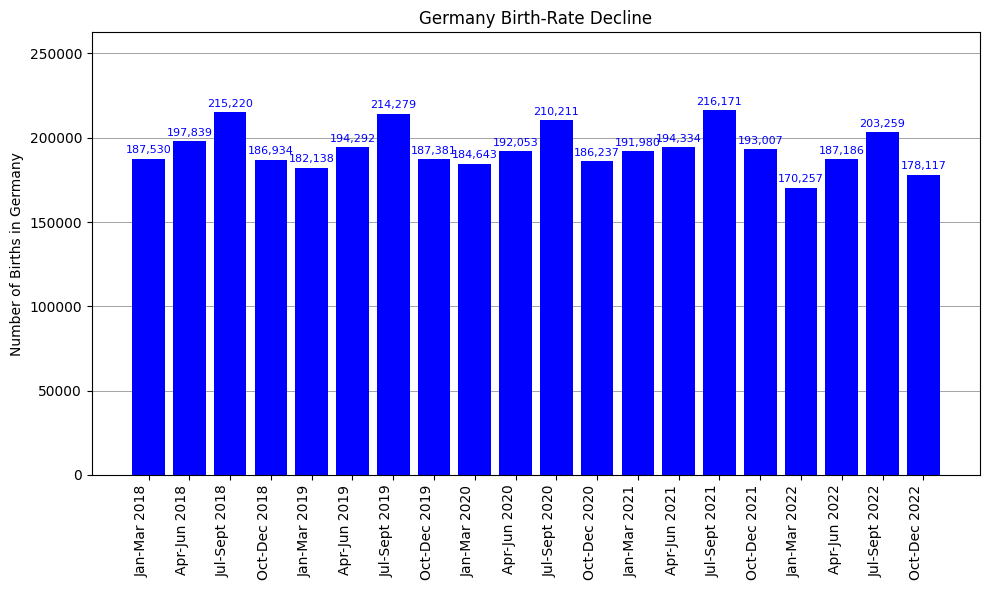

In [17]:
plt.figure(figsize=(10, 6))

for y in range(0, max(result['In Total']) + 50000, 50000):
    plt.axhline(y, color='gray', linestyle='-', linewidth=0.5, zorder=0)

for year in result['Year'].unique():
    subset = result[result['Year'] == year]
    labels = [f"{q} {year}" for q in subset['Quarter']]
    for label, value in zip(labels, subset['In Total']):
        plt.text(label, value + 2000, f'{value:,}', ha='center', va='bottom', fontsize=8, color='blue')
    plt.bar(labels, subset['In Total'], color='blue', label=str(year))


# plt.xlabel('Quarter and Year')
plt.ylabel('Number of Births in Germany')
plt.title('Germany Birth-Rate Decline')
plt.xticks(rotation=90, ha='right')
plt.yticks(range(0, max(result['In Total']) + 50000, 50000))
plt.tight_layout()
plt.show()